In [1]:
%autosave 0

Autosave disabled


In [2]:
import os
import numpy as np
import pandas as pd
#from sklearn.linear_model import Lasso, LassoCV, LinearRegression
#from sklearn.model_selection import KFold
from utilities import cal_score

In [3]:
stack_idx = '11'
models = '1-11,14-17'
use_test_kfold = set([2, 7, 8])

#is_per_area = False
#is_log = False

### Read CV predictions and test

In [4]:
def parse_models(exp):
    exp_split = exp.split(',')
    idx_models = []
    for e in exp_split:
        if '-' in e:
            n0, n1 = e.split('-')
            idx_models.extend(list(range(int(n0), int(n1)+1, 1)))
        else:
            idx_models.append(int(e))
    return idx_models

In [5]:
idx_models = parse_models(models)
print(idx_models)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]


In [6]:
files_in_output = [f for f in os.listdir('output/') if os.path.isfile('output/'+f)]
files_cv = {idx: [f for f in files_in_output 
                  if f.startswith('model-%02d-' % idx) and f.endswith('cv.csv')][0] 
            for idx in idx_models}
files_test_one = {idx: [f for f in files_in_output 
                        if f.startswith('model-%02d-' % idx) and f.endswith('test-one.csv')][0]
                  for idx in idx_models}
files_test_kf = {idx: [f for f in files_in_output 
                       if f.startswith('model-%02d-' % idx) and f.endswith('test-kfold.csv')][0]
                 for idx in idx_models}

In [7]:
for k in files_cv: 
    print('%2d'%k, files_cv[k])
    print('%2d'%k, files_test_kf[k])
    print('%2d'%k, files_test_one[k])

 1 model-01-lgb-cv.csv
 1 model-01-lgb-test-kfold.csv
 1 model-01-lgb-test-one.csv
 2 model-02-keras-search-cv.csv
 2 model-02-keras-search-test-kfold.csv
 2 model-02-keras-search-test-one.csv
 3 model-03-lgb-feats-selection-cv.csv
 3 model-03-lgb-feats-selection-test-kfold.csv
 3 model-03-lgb-feats-selection-test-one.csv
 4 model-04-lgb-PCA-cv.csv
 4 model-04-lgb-PCA-test-kfold.csv
 4 model-04-lgb-PCA-test-one.csv
 5 model-05-lgb-wo-per-area-cv.csv
 5 model-05-lgb-wo-per-area-test-kfold.csv
 5 model-05-lgb-wo-per-area-test-one.csv
 6 model-06-lgb-lr0.001-cv.csv
 6 model-06-lgb-lr0.001-test-kfold.csv
 6 model-06-lgb-lr0.001-test-one.csv
 7 model-07-keras-embedding-cv.csv
 7 model-07-keras-embedding-test-kfold.csv
 7 model-07-keras-embedding-test-one.csv
 8 model-08-keras-search-long-cv.csv
 8 model-08-keras-search-long-test-kfold.csv
 8 model-08-keras-search-long-test-one.csv
 9 model-09-lgb-feats-selection-75-cv.csv
 9 model-09-lgb-feats-selection-75-test-kfold.csv
 9 model-09-lgb-fea

#### Load area

In [8]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [9]:
cv = df_train[['building_id', 'building_area', 'total_price']]
test = df_test[['building_id', 'building_area']]

print('CV predictions:')
for i, idx_model in enumerate(idx_models):
    f = files_cv[idx_model]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)
    
    cv = pd.merge(cv, df[['building_id', 'total_price_predict']], on='building_id')
    
    cv = cv.rename(columns = {'total_price_predict': 'pred_{}'.format(idx_model)})
    cv[f'log_pred_{idx_model}'] = np.log1p(cv[f'pred_{idx_model}'])
    cv[f'log_parea_pred_{idx_model}'] = np.log1p( cv[f'pred_{idx_model}'] / cv['building_area'] )

cv['log_total_price'] = np.log1p(cv['total_price'])
cv['log_parea_total_price'] = np.log1p( cv['total_price'] / cv['building_area'] )

print('Test predictions:')
for i, idx in enumerate(idx_models):
    f = files_test_kf[idx] if idx in use_test_kfold else files_test_one[idx]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)

    test = pd.merge(test, df[['building_id','total_price']], on='building_id')
        
    test = test.rename(columns = {'total_price': 'pred_{}'.format(idx)})
    test[f'log_pred_{idx}'] = np.log1p(test[f'pred_{idx}'])
    test[f'log_parea_pred_{idx}'] = np.log1p( test[f'pred_{idx}'] / test['building_area'] )

CV predictions:
No. 0 file: model-01-lgb-cv.csv
No. 1 file: model-02-keras-search-cv.csv
No. 2 file: model-03-lgb-feats-selection-cv.csv
No. 3 file: model-04-lgb-PCA-cv.csv
No. 4 file: model-05-lgb-wo-per-area-cv.csv
No. 5 file: model-06-lgb-lr0.001-cv.csv
No. 6 file: model-07-keras-embedding-cv.csv
No. 7 file: model-08-keras-search-long-cv.csv
No. 8 file: model-09-lgb-feats-selection-75-cv.csv
No. 9 file: model-10-lgb-feats-selection-75-lr-0.001-cv.csv
No. 10 file: model-11-rf-cv.csv
No. 11 file: model-14-lgb-feats-selection-75-lr-0.001-rand-cv.csv
No. 12 file: model-15-lgb-feats-selection-75-lr-0.001-rand323-cv.csv
No. 13 file: model-16-lgb-feats-selection-68-lr-0.001-mix5-cv.csv
No. 14 file: model-17-lgb-feats-selection-70-lr-0.001-mix5-cv.csv
Test predictions:
No. 0 file: model-01-lgb-test-one.csv
No. 1 file: model-02-keras-search-test-kfold.csv
No. 2 file: model-03-lgb-feats-selection-test-one.csv
No. 3 file: model-04-lgb-PCA-test-one.csv
No. 4 file: model-05-lgb-wo-per-area-test-

In [10]:
cv.head()

,building_id,building_area,total_price,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,...,log_pred_15,log_parea_pred_15,pred_16,log_pred_16,log_parea_pred_16,pred_17,log_pred_17,log_parea_pred_17,log_total_price,log_parea_total_price
0,e3mMIMR3JJqCaXz1,3.418175,6.476038e+05,6.331552e+05,13.358472,12.129369,717209.94,13.483125,12.254022,6.656891e+05,...,13.411432,12.182328,6.542462e+05,13.391241,12.162137,6.552449e+05,13.392766,12.163663,13.381036,12.151933
1,LgwzgklNvy4QCtq5,4.041309,3.321452e+06,3.064324e+06,14.935338,13.538770,2899842.20,14.880167,13.483600,3.079196e+06,...,14.963920,13.567353,3.128284e+06,14.955995,13.559428,3.130186e+06,14.956603,13.560036,15.015913,13.619345
2,ucIR2NLLsC3T650L,5.584279,9.570885e+06,9.827776e+06,16.100723,14.380769,9766813.00,16.094501,14.374546,9.814852e+06,...,16.091430,14.371475,9.758797e+06,16.093680,14.373725,9.787304e+06,16.096597,14.376642,16.074236,14.354282
3,jre1pJhcQj91Kdky,13.563031,1.421501e+07,1.255350e+07,16.345510,13.738164,12699800.00,16.357097,13.749750,1.255981e+07,...,16.351229,13.743883,1.266868e+07,16.354644,13.747297,1.270893e+07,16.357815,13.750469,16.469809,13.862462
4,rQpYpY9nRG7X5mmr,4.688108,7.627120e+05,1.215194e+06,14.010415,12.465389,2012610.50,14.514944,12.969916,1.128419e+06,...,13.923267,12.378241,1.122232e+06,13.930831,12.385805,1.110012e+06,13.919882,12.374856,13.544637,11.999613


In [11]:
test.head()

,building_id,building_area,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,log_pred_3,...,log_parea_pred_14,pred_15,log_pred_15,log_parea_pred_15,pred_16,log_pred_16,log_parea_pred_16,pred_17,log_pred_17,log_parea_pred_17
0,X5gsdTWGS3W7JJQB,3.418175,1.526912e+07,16.541343,15.312236,12470072.0,16.338842,15.109735,1.531685e+07,16.544464,...,15.270289,1.476388e+07,16.507694,15.278587,1.388634e+07,16.446416,15.217310,1.449905e+07,16.489594,15.260487
1,BTshNOJyKHnT2YIT,7.726227,3.924241e+06,15.182684,13.138065,3916552.2,15.180723,13.136104,3.977095e+06,15.196062,...,13.144670,3.928353e+06,15.183731,13.139112,3.918650e+06,15.181258,13.136639,3.917960e+06,15.181082,13.136463
2,dhdymr0lV8N5kZOT,12.170581,1.096127e+07,16.209879,13.710858,11912735.0,16.293119,13.794098,1.084967e+07,16.199646,...,13.677153,1.062900e+07,16.179096,13.680076,1.073546e+07,16.189063,13.690042,1.063343e+07,16.179513,13.680493
3,VEwyGGMcD56w5BOc,2.252256,6.155550e+06,15.632865,14.820933,5940670.0,15.597333,14.785400,6.015238e+06,15.609807,...,14.815150,6.085773e+06,15.621464,14.809532,6.080935e+06,15.620669,14.808737,6.119193e+06,15.626941,14.815009
4,wmUeMoJZfsqaSX9b,5.813985,1.062995e+06,13.876602,12.116340,1088488.1,13.900301,12.140039,1.027248e+06,13.842395,...,12.116189,1.061918e+06,13.875588,12.115326,1.072461e+06,13.885468,12.125206,1.084776e+06,13.896885,12.136623


### Check models scores

In [21]:
scores_models = {idx_model: cal_score(cv['total_price'], cv[f'pred_{idx_model}'])
                 for idx_model in idx_models}

In [23]:
for i, (idx_model, s) in enumerate(scores_models.items()):
    print('%2d'%i, 'model-%02d'%idx_model, '%.6f'%s)

 0 model-01 5870.873059
 1 model-02 5400.852164
 2 model-03 5877.873452
 3 model-04 5713.867808
 4 model-05 5724.869598
 5 model-06 5886.873769
 6 model-07 5171.836449
 7 model-08 5514.858826
 8 model-09 5872.873118
 9 model-10 5897.873845
10 model-11 5075.838018
11 model-14 5908.873901
12 model-15 5900.873836
13 model-16 5907.874126
14 model-17 5905.874165


### Search subset model mean 

In [13]:
def get_prefix(is_per_area, is_log):
    if is_log:
        if is_per_area:
            col_prefix = 'log_parea_pred'
        else:
            col_prefix = 'log_pred'
    else:
        if is_per_area:
            raise 'Not support'
        else:
            col_prefix = 'pred'
    return col_prefix

In [14]:
def mean_subset(df, idx_models, is_per_area, is_log):
    col_prefix = get_prefix(is_per_area, is_log)
    cols_models = [col_prefix+'_'+str(i) for i in idx_models]
    return df[cols_models].mean(axis=1)

In [15]:
def predict_mean_subset(df, idx_models, is_per_area, is_log):
    y_pred = mean_subset(df, idx_models, is_per_area, is_log)
    y_pred_final = y_pred
    if is_log:
        y_pred_final = np.expm1(y_pred_final)
    if is_per_area:
        y_pred_final = y_pred_final * df['building_area']
    return y_pred_final

In [16]:
def search_mean_subset(cv, idx_models, is_per_area, is_log):
    idx_models_subset = idx_models.copy()
    result_list = []
    y_pred_cv = predict_mean_subset(cv, idx_models_subset, is_per_area=is_per_area, is_log=is_log)
    score = cal_score(cv['total_price'], y_pred_cv)
    print('%.6f'%score, idx_models_subset)
    result_list.append([score, idx_models_subset])
    while len(idx_models_subset) > 1:
        print('N models remained:', len(idx_models_subset))
        result_list_subset = []
        for i_rm in range(len(idx_models_subset)):
            idx_models_subset_next = idx_models_subset[:i_rm]+idx_models_subset[i_rm+1:]
            y_pred_cv = predict_mean_subset(cv, idx_models_subset_next, is_per_area=is_per_area, is_log=is_log)
            score = cal_score(cv['total_price'], y_pred_cv)
            print('%.6f'%score, idx_models_subset_next)
            result_list_subset.append([score, idx_models_subset_next])
        result_list.extend(result_list_subset)
        result_list_subset.sort(key=lambda x: x[0], reverse=True)
        print('Best of the round:', result_list_subset[0][0], result_list_subset[0][1])
        idx_models_subset = result_list_subset[0][1]
        print()
    result_list.sort(key=lambda x: x[0], reverse=True)
    return result_list

#### Log mean

In [17]:
result_list_log = search_mean_subset(cv, idx_models, is_per_area=False, is_log=True)

5919.874467 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
N models remained: 15
5921.874399 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5924.874373 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5914.874372 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5916.874420 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5917.874232 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5921.874386 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5913.874387 [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 16, 17]
5911.874336 [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17]
5923.874398 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 16, 17]
5916.874371 [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17]
5936.875176 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17]
5919.874366 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17]
5918.874371 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 17]
5917.874356 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 17]
5918.874352 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16]
Best 

In [18]:
display(result_list_log[:10])

[[5942.875121834004, [3, 4, 5, 7, 8, 10, 14, 16, 17]],
 [5942.8749798044755, [4, 5, 7, 8, 10, 14, 16, 17]],
 [5941.875038789146, [2, 3, 4, 5, 6, 7, 8, 10, 14, 16, 17]],
 [5940.87519730079, [3, 4, 5, 6, 7, 8, 10, 14, 15, 16, 17]],
 [5940.875172702243, [3, 4, 5, 6, 7, 8, 10, 14, 16, 17]],
 [5940.875106267237, [3, 4, 5, 6, 7, 8, 14, 16, 17]],
 [5940.875098400611, [4, 5, 6, 7, 8, 10, 14, 16, 17]],
 [5940.875083220059, [3, 4, 5, 6, 7, 8, 10, 14, 16]],
 [5940.875048671748, [2, 3, 4, 5, 7, 8, 10, 14, 15, 16, 17]],
 [5940.875038001536, [2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17]]]

In [24]:
best_models_subset_log = result_list_log[0][1]
print('Best score and subset:', '%.6f'%result_list_log[0][0], best_models_subset_log)
for idx_model in best_models_subset_log:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5942.875122 [3, 4, 5, 7, 8, 10, 14, 16, 17]
model-03 5877.873452
model-04 5713.867808
model-05 5724.869598
model-07 5171.836449
model-08 5514.858826
model-10 5897.873845
model-14 5908.873901
model-16 5907.874126
model-17 5905.874165


In [20]:
# per area or not for the mean ensemble model are the same
#result_list_per_area_log = search_mean_subset(cv, idx_models, is_per_area=True, is_log=True)
#result_list_per_area_log

#### Linear mean

In [25]:
result_list_none = search_mean_subset(cv, idx_models, is_per_area=False, is_log=False)

5916.873085 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
N models remained: 15
5916.872927 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5923.873096 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5915.872900 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5912.872976 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5915.872784 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5919.872912 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14, 15, 16, 17]
5913.873733 [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 16, 17]
5910.872969 [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17]
5920.872926 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 16, 17]
5916.872895 [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17]
5931.873926 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17]
5915.872891 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17]
5917.872897 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 17]
5918.872881 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 17]
5916.872877 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16]
Best 

In [27]:
display(result_list_none[:10])

[[5943.873533816494, [3, 4, 5, 7, 8, 10, 15, 16, 17]],
 [5940.873714031534, [3, 4, 5, 7, 8, 9, 10, 15, 16, 17]],
 [5940.873502974041, [3, 4, 5, 7, 8, 9, 15, 16, 17]],
 [5940.87349497661, [4, 5, 7, 8, 9, 10, 15, 16, 17]],
 [5940.8732204836515, [4, 5, 7, 8, 10, 15, 16, 17]],
 [5939.873504113526, [3, 4, 5, 7, 8, 9, 10, 16, 17]],
 [5939.873481553874, [2, 3, 4, 5, 7, 8, 9, 10, 15, 16, 17]],
 [5938.873694147015, [2, 3, 4, 5, 7, 8, 9, 10, 14, 15, 16, 17]],
 [5938.873488950203, [2, 3, 4, 5, 7, 8, 9, 10, 14, 16, 17]],
 [5938.873313590779, [2, 3, 5, 7, 8, 9, 10, 15, 16, 17]]]

In [28]:
best_models_subset_none = result_list_none[0][1]
print('Best score and subset:', '%.6f'%result_list_none[0][0], best_models_subset_none)
for idx_model in best_models_subset_none:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5943.873534 [3, 4, 5, 7, 8, 10, 15, 16, 17]
model-03 5877.873452
model-04 5713.867808
model-05 5724.869598
model-07 5171.836449
model-08 5514.858826
model-10 5897.873845
model-15 5900.873836
model-16 5907.874126
model-17 5905.874165


### Compute submission for mean log

In [29]:
import matplotlib.pyplot as plt

In [30]:
print('Predict for mean log with', best_models_subset_log)
test['total_price'] = predict_mean_subset(test, best_models_subset_log, is_per_area=False, is_log=True)

Predict for mean log with [3, 4, 5, 7, 8, 10, 14, 16, 17]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


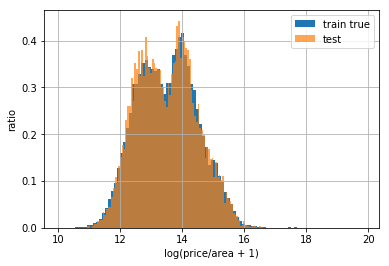

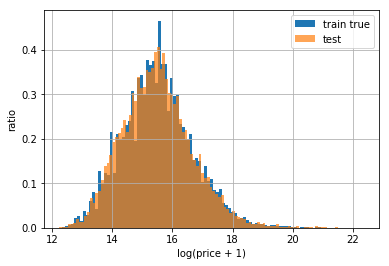

In [31]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(np.log1p(cv['building_area']), bins=100, label='train', normed=True)
plt.hist(np.log1p(test['building_area']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(building_area + 1)'); plt.ylabel('ratio'); plt.yscale('log')
plt.legend(); plt.grid(); plt.show()

In [32]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.382257e+07
1,BTshNOJyKHnT2YIT,3.926757e+06
2,dhdymr0lV8N5kZOT,1.113643e+07
3,VEwyGGMcD56w5BOc,6.038317e+06
4,wmUeMoJZfsqaSX9b,1.064189e+06
9995,UEeCDaAJzPwdKKKA,1.235242e+06
9996,i0fgbPaQsDWs7Q87,4.741861e+07
9997,YunNwAhcqkf6YclI,1.095633e+06
9998,A2NotxtRY9MYoWMl,2.973214e+06
9999,kKvgBXiA50gRmQhP,3.112596e+06


shape = (10000, 2)


In [33]:
output_filename = 'output/stack_meanlog_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_meanlog_11_1-11,14-17.csv


In [34]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [35]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.382257e+07
1,BTshNOJyKHnT2YIT,3.926757e+06
2,dhdymr0lV8N5kZOT,1.113643e+07
3,VEwyGGMcD56w5BOc,6.038317e+06
4,wmUeMoJZfsqaSX9b,1.064189e+06
9995,UEeCDaAJzPwdKKKA,1.235242e+06
9996,i0fgbPaQsDWs7Q87,4.741861e+07
9997,YunNwAhcqkf6YclI,1.095633e+06
9998,A2NotxtRY9MYoWMl,2.973214e+06
9999,kKvgBXiA50gRmQhP,3.112596e+06


shape = (10000, 2)


### Compute submission for linear mean

In [36]:
import matplotlib.pyplot as plt

In [37]:
print('Predict for liear mean with', best_models_subset_none)
test['total_price'] = predict_mean_subset(test, best_models_subset_none, is_per_area=False, is_log=False)

Predict for liear mean with [3, 4, 5, 7, 8, 10, 15, 16, 17]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


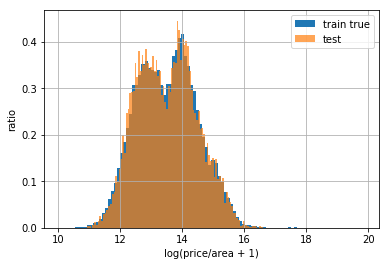

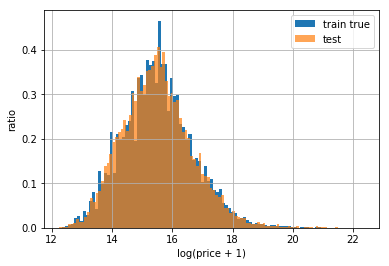

In [38]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

In [39]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.388185e+07
1,BTshNOJyKHnT2YIT,3.924688e+06
2,dhdymr0lV8N5kZOT,1.115398e+07
3,VEwyGGMcD56w5BOc,6.035152e+06
4,wmUeMoJZfsqaSX9b,1.064497e+06
9995,UEeCDaAJzPwdKKKA,1.236378e+06
9996,i0fgbPaQsDWs7Q87,4.749268e+07
9997,YunNwAhcqkf6YclI,1.095208e+06
9998,A2NotxtRY9MYoWMl,2.974268e+06
9999,kKvgBXiA50gRmQhP,3.117081e+06


shape = (10000, 2)


In [40]:
output_filename = 'output/stack_mean_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_mean_11_1-11,14-17.csv


In [41]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [42]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.388185e+07
1,BTshNOJyKHnT2YIT,3.924688e+06
2,dhdymr0lV8N5kZOT,1.115398e+07
3,VEwyGGMcD56w5BOc,6.035152e+06
4,wmUeMoJZfsqaSX9b,1.064497e+06
9995,UEeCDaAJzPwdKKKA,1.236378e+06
9996,i0fgbPaQsDWs7Q87,4.749268e+07
9997,YunNwAhcqkf6YclI,1.095208e+06
9998,A2NotxtRY9MYoWMl,2.974268e+06
9999,kKvgBXiA50gRmQhP,3.117081e+06


shape = (10000, 2)
